<h1><b>Flower Recognition Using Convolutional Neural Network</b></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3><mark>import All Packages</mark></h3>

---

In [ ]:
import gradio as gr

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

<h3><mark>Data preprocessing</mark></h3>

---


1.**Create a data augmentor**

In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)
print(train_datagen)
print(test_datagen)

> The code snippet creates an ImageDataGenerator object for augmenting and preprocessing images during training and testing.

**The parameters include:**
*  **rescale=1. / 255**: Scales pixel values to the range [0, 1].
*   **shear_range=0.2**: Applies shear transformations within a specified range.
*  **zoom_range=0.2**: Allows zooming in or out by up to 20%.
*   **horizontal_flip=True**: Enables horizontal flipping for data augmentation.
*  **validation_split=0.2**: Reserves 20% of the data for validation during training.

2.   **Create datasets**

In [ ]:
train_datagen = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers_dataset/training_set',
												target_size=(64,64),batch_size=32,class_mode='categorical')
test_datagen = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers_dataset/text_set',
												target_size=( 64,64),batch_size=32,class_mode='categorical')

Found 3894 images belonging to 5 classes.
Found 450 images belonging to 5 classes.


>The code snippet uses the flow_from_directory method to create a data generator for training a neural network.

**Explanation :**
*  **Directory Path**: Specifies the directory containing training images and testing images.
*   **Target Size**: Resizes images to 64x64 pixels.
*  **Batch Size**: Determines the number of images in each training batch.
*   **Class Mode**: Labels are categorical for multi-class classification.

<h3><mark>Building Model</mark></h3>

---

In [ ]:
cnn = tf.keras.models.Sequential()
print(cnn)

initializes an empty Sequential model in TensorFlow's Keras API, providing a foundation for constructing neural networks layer by layer in a sequential manner.

<h3><mark>Building Convolution Layer</h3></mark>

---

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))

The code adds a Convolutional 2D layer to the Sequential neural network model (cnn).
The layer has 64 filters.
* a kernel size of 3x3.
* ReLU activation function.
* an input shape of (64, 64, 3).

This convolutional layer is commonly used for feature extraction in image data.

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

The code adds a MaxPooling 2D layer to the Sequential neural network model (cnn).
* This layer performs max pooling with a pool size of 2x2 and a stride of 2.

Max pooling is a downsampling operation commonly used in convolutional neural networks (CNNs) to reduce spatial dimensions and retain important features in the data.

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))

The code adds another Convolutional 2D layer to the Sequential neural network model (cnn).
* This layer has 64 filters.
* a kernel size of 3x3.
* uses the ReLU activation function.

The absence of the input_shape parameter indicates that the model assumes the input shape to be the output shape of the previous layer, which, in this case, would be inferred automatically based on the preceding layers.

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

The code adds a MaxPooling 2D layer to the Sequential neural network (cnn) with a 2x2 pooling size and a stride of 2.

Max pooling is commonly used for downsampling and retaining important features in convolutional neural networks.

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

The code adds a Dropout layer to the Sequential neural network (cnn) with a dropout rate of 0.5.

Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.

In [ ]:
cnn.add(tf.keras.layers.Flatten())

The code adds a Flatten layer to the Sequential neural network (cnn).

This layer is used to flatten the input data, transforming it from a multi-dimensional tensor into a one-dimensional vector.

It is often used to transition from convolutional layers to fully connected layers in a neural network.

In [ ]:
cnn.add(tf.keras.layers.Dense(units=120,activation='relu'))

The code adds a Dense layer to the Sequential neural network (cnn) with 120 units and ReLU activation.

Dense layers are fully connected layers where each unit is connected to every unit in the previous layer, and they are commonly used for learning high-level features in neural networks.

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

The code adds a Dense layer to the Sequential neural network (cnn) with 5 units and a softmax activation function.

This layer is typically used for multi-class classification problems, where the output represents the probability distribution across different classes.

The softmax activation ensures that the output values are normalized to probabilities, and the class with the highest probability is predicted.

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

The code compiles the Sequential neural network (cnn) using
* the RMSprop optimizer.
* categorical crossentropy loss function.
* accuracy as the metric for evaluation.

Compiling a model is a necessary step before training, specifying the optimizer, loss function, and evaluation metric for the training process.

In [ ]:
cnn.fit(x=train_datagen,validation_data=test_datagen,epochs=30)

Epoch 1/30
122/122 [==============================] - 1358s 11s/step - loss: 1.3203 - accuracy: 0.4435 - val_loss: 1.3004 - val_accuracy: 0.4956
Epoch 2/30
122/122 [==============================] - 19s 158ms/step - loss: 1.0705 - accuracy: 0.5847 - val_loss: 1.0164 - val_accuracy: 0.6000
Epoch 3/30
122/122 [==============================] - 20s 165ms/step - loss: 0.9776 - accuracy: 0.6251 - val_loss: 0.9932 - val_accuracy: 0.6244
Epoch 4/30
122/122 [==============================] - 18s 148ms/step - loss: 0.9135 - accuracy: 0.6484 - val_loss: 1.0636 - val_accuracy: 0.6044
Epoch 5/30
122/122 [==============================] - 19s 157ms/step - loss: 0.8508 - accuracy: 0.6715 - val_loss: 0.9682 - val_accuracy: 0.6156
Epoch 6/30
122/122 [==============================] - 19s 154ms/step - loss: 0.8117 - accuracy: 0.6913 - val_loss: 0.9183 - val_accuracy: 0.6711
Epoch 7/30
122/122 [==============================] - 18s 149ms/step - loss: 0.7686 - accuracy: 0.7114 - val_loss: 0.9922 - val_ac

The code trains the Sequential neural network (cnn) using the training data generated by train_datagen and validates it on the test data generated by test_datagen.

The training process is set to run for 30 epochs. The fit method is a key function for training a model, and it adjusts the model's parameters based on the provided data, optimizing it to minimize the specified loss function.

<h3><mark>Preprocessing New Image</mark></h3>


---

In [ ]:
from keras.preprocessing import image

The line from keras.preprocessing import image imports the image module from the keras.preprocessing package.

This module provides functions for working with images in the context of deep learning, including loading and preprocessing images for model input

In [ ]:
test_image = image.load_img('/content/drive/MyDrive/flowers_dataset/prediction/th (2).jpg',target_size=(64,64))

The code loads an image located at '/content/drive/MyDrive/flowers_dataset/prediction/th (2).jpg' and resizes it to a 64x64 pixel format using the load_img function from the keras.preprocessing.image module.

<h4><b>Reading the input image</b> </h4>

input image is = 


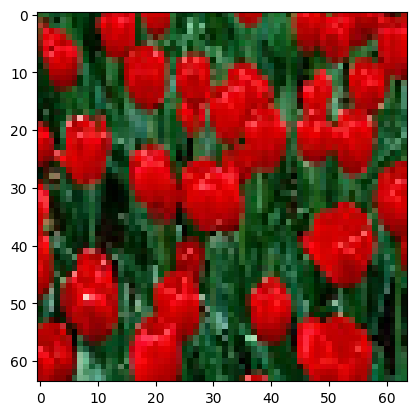

In [ ]:
print('input image is = ')
plt.imshow(test_image)

In [ ]:
test_image = image.img_to_array(test_image)

The image.img_to_array(test_image) code converts a PIL (Python Imaging Library) image, represented by the test_image variable, into a NumPy array. This conversion is a common preprocessing step in deep learning workflows, as many deep learning models, especially those built with frameworks like TensorFlow or Keras, expect input data in the form of NumPy arrays.

The resulting NumPy array would contain the pixel values of the image, allowing it to be easily used as input to a neural network for tasks such as image classification. The shape of the array would typically be (height, width, channels), where "channels" represents the color channels (e.g., 3 for RGB images).

In [ ]:
test_image = np.expand_dims(test_image,axis=0)

The line test_image = np.expand_dims(test_image, axis=0) adds an extra dimension to the NumPy array test_image. This is often necessary when working with deep learning models that expect input data in a specific shape, such as (batch_size, height, width, channels).

In this case, it's adding a batch dimension to the image. The resulting shape of test_image would be (1, height, width, channels), indicating that there is one image in the batch.

This step is typically required when you want to feed a single image to a model that expects a batch of images, as it aligns the array shape with the expected input shape of the model.

In [ ]:
result = cnn.predict(test_image)

1/1 [==============================] - 0s 18ms/step


The code result = cnn.predict(test_image) predicts the output using the trained neural network (cnn) for the provided input image (test_image).

In [ ]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

The code `train_datagen.class_indices` retrieves the class indices dictionary from the training data generator, mapping class names to numerical indices.

In [ ]:
print(result)

[[0. 0. 0. 0. 1.]]


<h4><mark>Final Result</mark></h4>

In [ ]:
print("output is = ")
if result[0][0] ==1:
  print('daisy')
elif result[0][1] == 1:
  print('dandelion')
elif result[0][2] == 1:
  print('rose')
elif result[0][3] == 1:
  print('sunflower')
elif result[0][4] == 1:
  print('tulip')

output is = 
tulip
